# <div style="text-align: center; background-color:black; font-family:Georgia, serif; color: blue; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Credit Card Customer Segmentation</div>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
data=pd.read_csv('Credit Card Customer Data.csv')

In [3]:
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


* Sl_No: Unique number for each record.
* Customer Key: Unique ID for each customer.
* Avg_Credit_Limit: Average credit limit assigned to the customer.
* Total_Credit_Cards: Total number of credit cards the customer has.
* Total_visits_bank: Total visits the customer has made to the bank.
* Total_visits_online: Total times the customer has accessed online banking.
* Total_calls_made: Total number of calls made by the customer to the bank.

# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


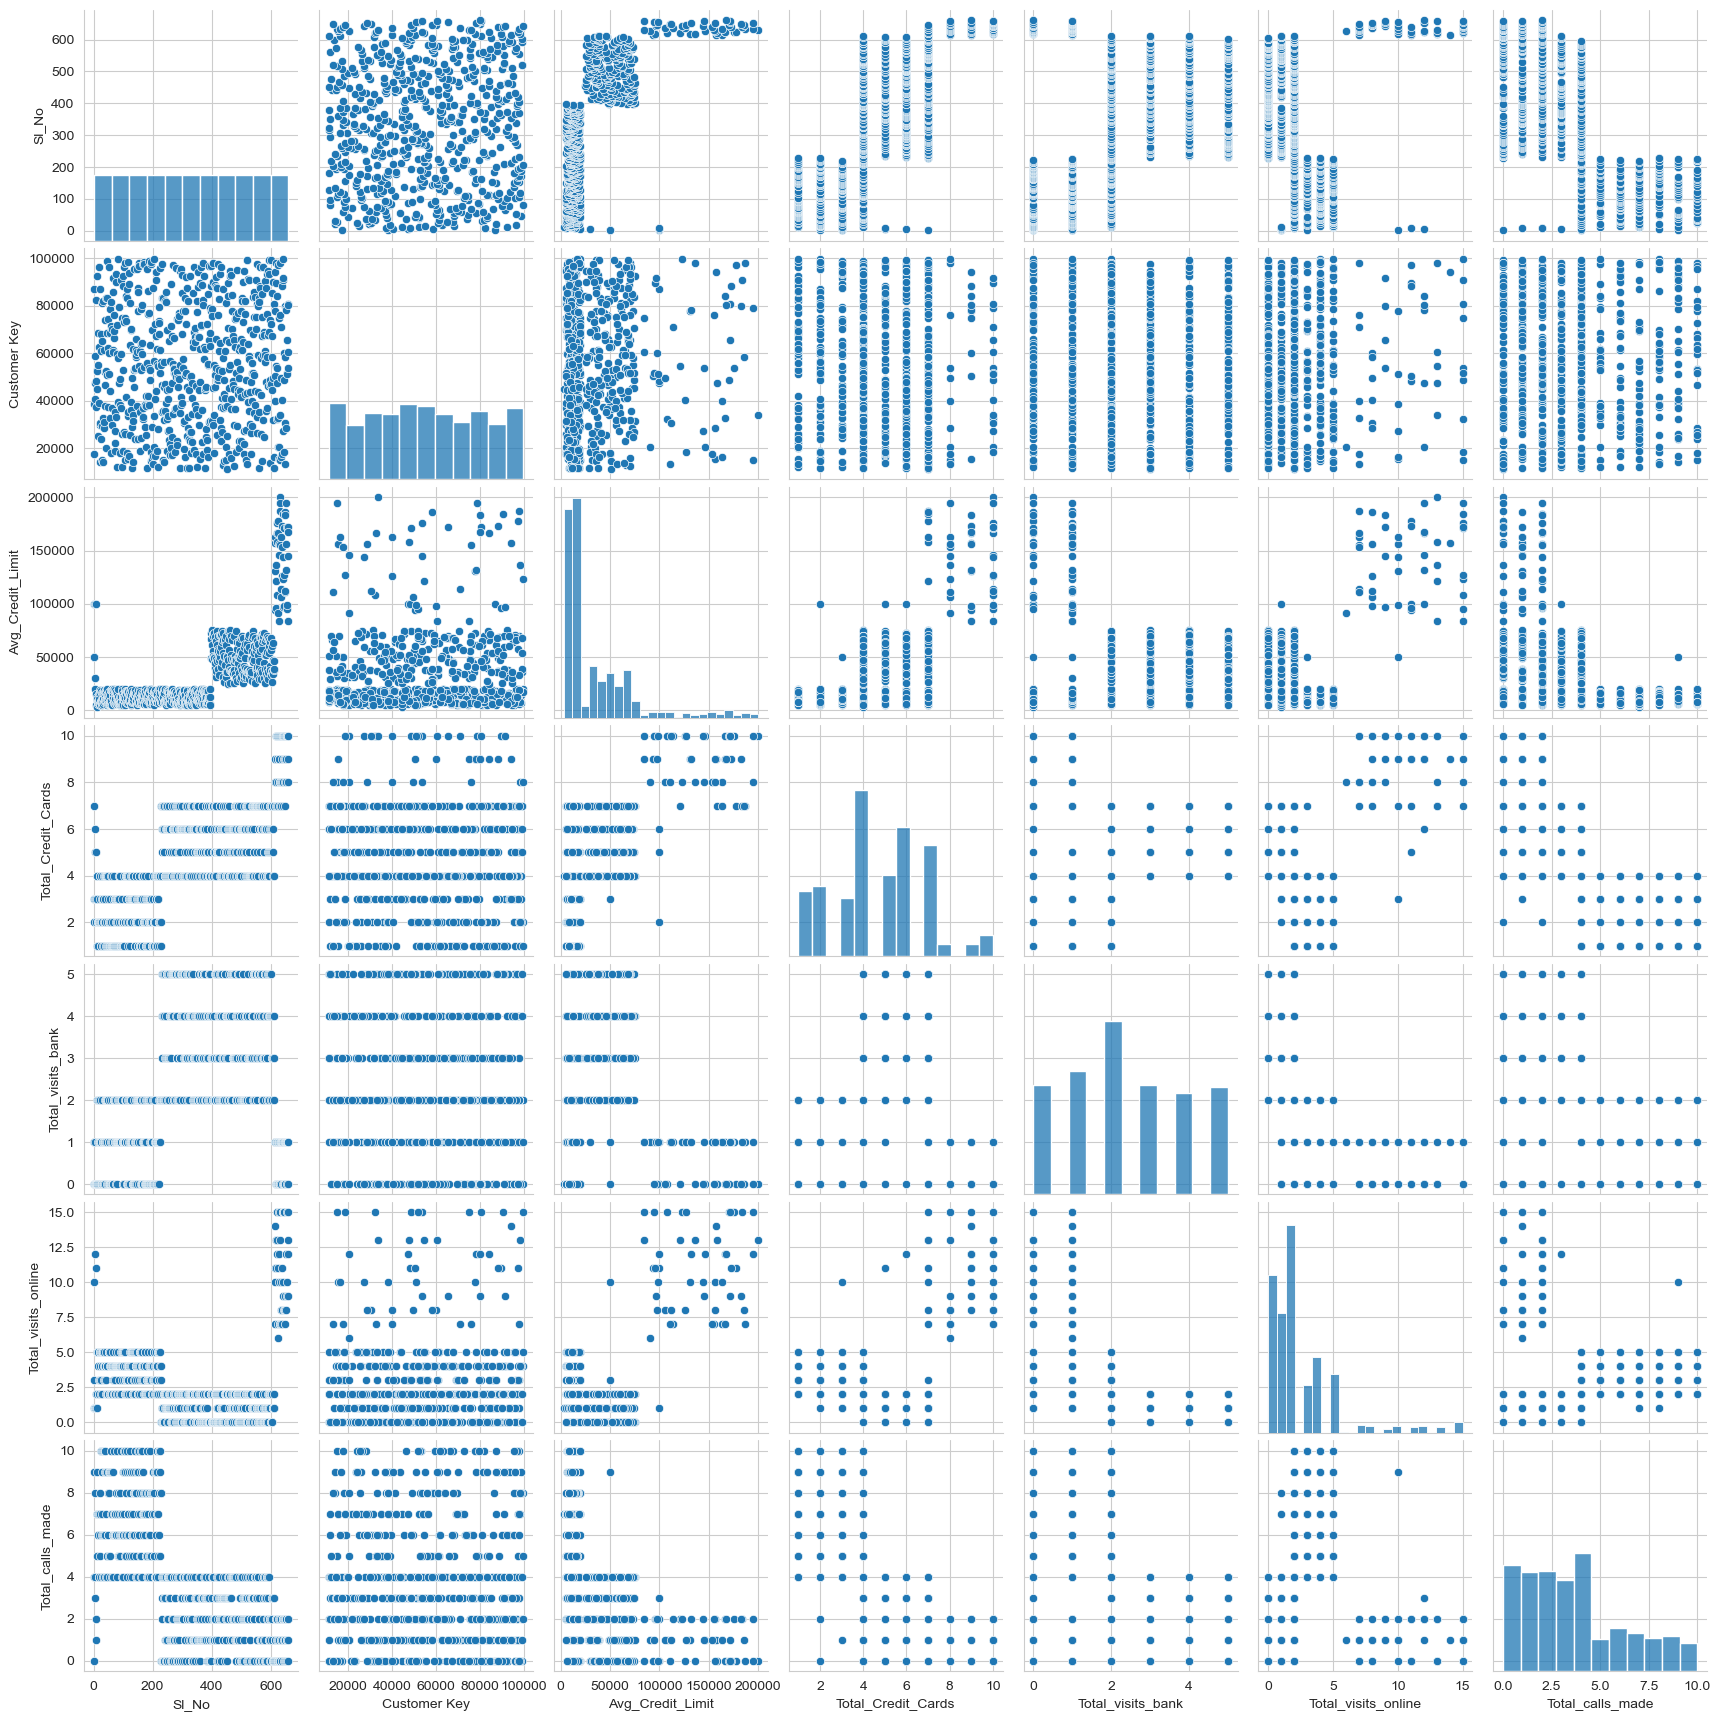

In [6]:
sns.set_style("whitegrid")
sns.pairplot(data);
plt.show()

In [7]:
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [8]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

# What are the top 5 most common total credit card counts among customers?

In [9]:
data['Total_Credit_Cards'].value_counts().head()

4    151
6    117
7    101
5     74
2     64
Name: Total_Credit_Cards, dtype: int64

<Axes: ylabel='Total_Credit_Cards'>

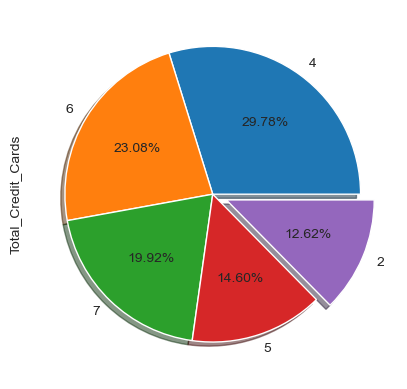

In [10]:
data['Total_Credit_Cards'].value_counts().head().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%1.2f%%")

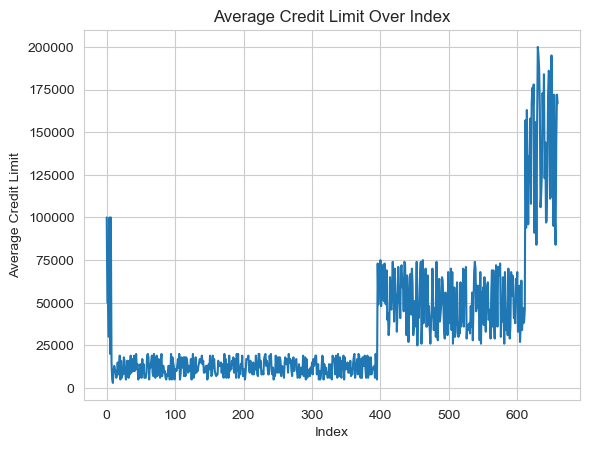

In [11]:
sns.lineplot(x=data.index, y=data['Avg_Credit_Limit'])
plt.title('Average Credit Limit Over Index')
plt.xlabel('Index')
plt.ylabel('Average Credit Limit')
plt.show()

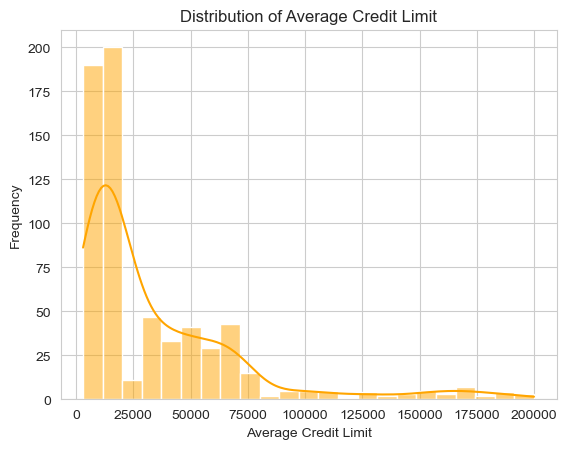

In [12]:
sns.histplot(data['Avg_Credit_Limit'], kde=True,color='orange')
plt.title('Distribution of Average Credit Limit')
plt.xlabel('Average Credit Limit')
plt.ylabel('Frequency')
plt.show()

# Frequency of Total Bank Visits by Customers

In [13]:
data['Total_visits_bank'].value_counts()

2    158
1    112
0    100
3    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

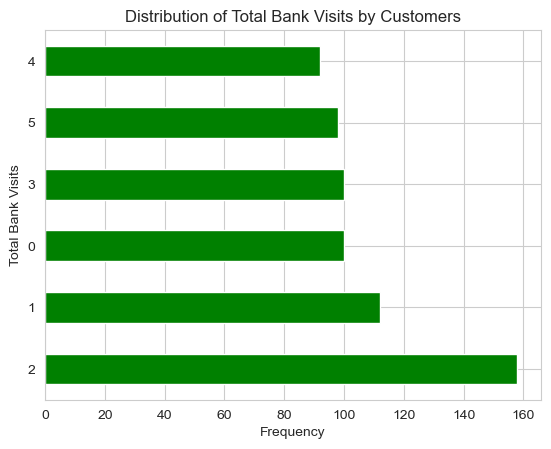

In [14]:
data['Total_visits_bank'].value_counts().plot(kind='barh',color='green');
plt.title('Distribution of Total Bank Visits by Customers')
plt.xlabel('Frequency')
plt.ylabel('Total Bank Visits')
plt.show()

# Relationship Between Total Credit Cards and Average Credit Limit

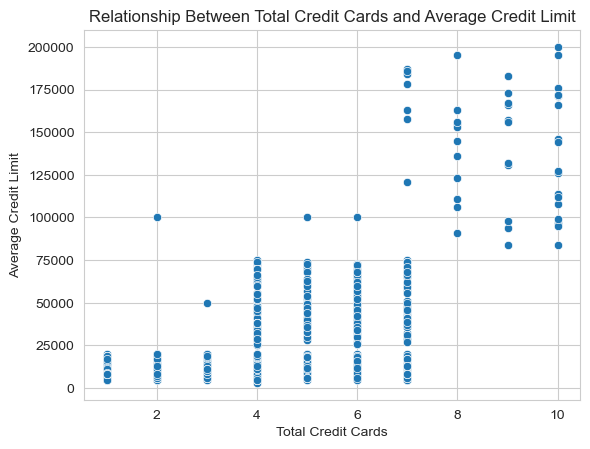

In [15]:
sns.scatterplot(x='Total_Credit_Cards',y='Avg_Credit_Limit',data=data,palette='viridis')
plt.title('Relationship Between Total Credit Cards and Average Credit Limit')
plt.xlabel('Total Credit Cards')
plt.ylabel('Average Credit Limit');

Text(0, 0.5, 'Average Credit Limit')

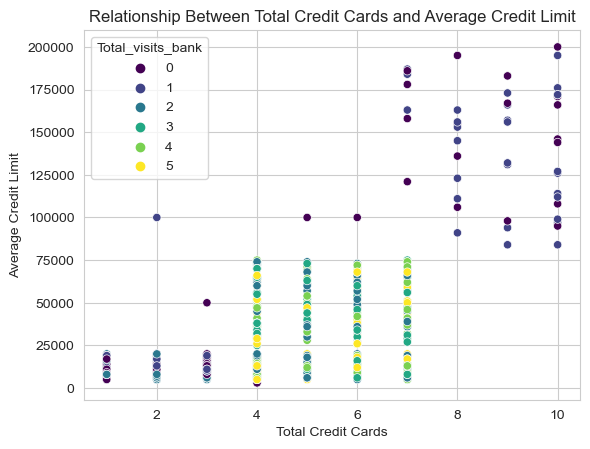

In [16]:
sns.scatterplot(x='Total_Credit_Cards',y='Avg_Credit_Limit',data=data,hue='Total_visits_bank',palette='viridis')
plt.title('Relationship Between Total Credit Cards and Average Credit Limit')
plt.xlabel('Total Credit Cards')
plt.ylabel('Average Credit Limit')

# Top 5 Most Frequent Call Counts

In [17]:
data['Total_calls_made'].value_counts()

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64

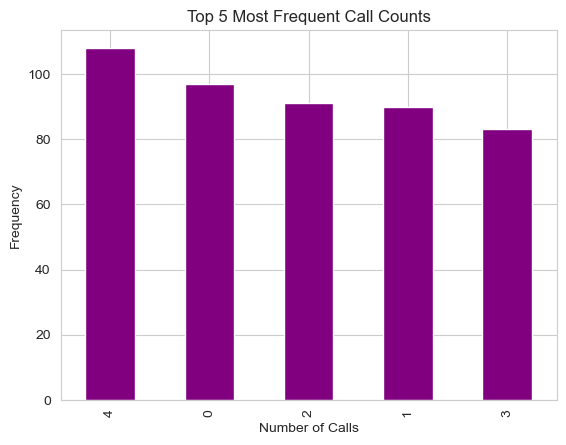

In [18]:
data['Total_calls_made'].value_counts().head().plot(kind='bar',color='purple')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Call Counts')
plt.show()

# Distribution of Total Visits Online

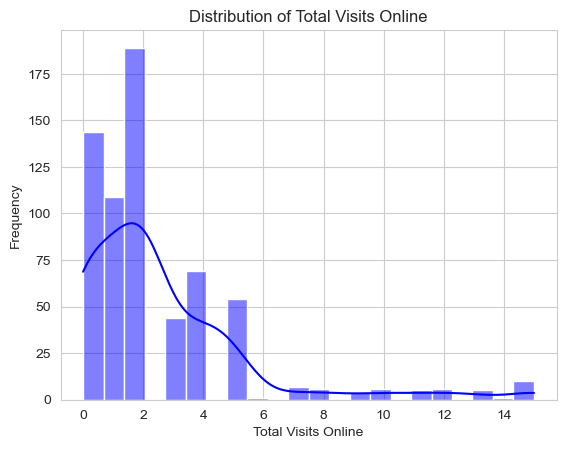

In [19]:
sns.histplot(data['Total_visits_online'], kde=True,color='blue')
plt.xlabel('Total Visits Online')
plt.ylabel('Frequency')
plt.title('Distribution of Total Visits Online')
plt.show()

In [20]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

# Preprocessing

In [21]:
x=data.iloc[:,2:]
x

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


# Scaling data

In [22]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(x)

In [23]:
data_scaled=pd.DataFrame(data_scaled,columns=x.columns)

# Finding the optimum number of clusters for k-means classification

In [24]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

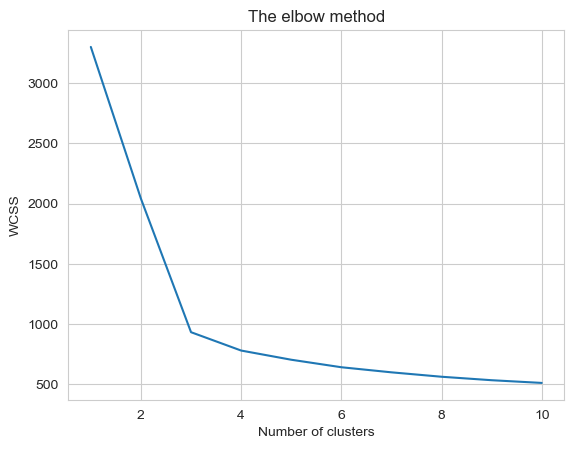

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_scaled)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [27]:
kmeans.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
kmeans.cluster_centers_

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [29]:
# Assuming y_kmeans contains cluster labels (0, 1, 2)
cluster_0_data = data_scaled[y_kmeans == 0]
cluster_1_data = data_scaled[y_kmeans == 1]
cluster_2_data = data_scaled[y_kmeans == 2]


In [30]:
cluster_2_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
612,3.256266,1.982253,-0.860451,3.884078,-0.902271
613,1.580600,1.982253,-0.860451,2.861408,-1.251537
614,3.415854,1.520613,-0.860451,1.497849,-0.902271
615,2.564721,1.982253,-0.860451,2.520519,-0.902271
616,1.633795,2.443892,-0.860451,2.861408,-0.553005
617,2.697711,1.520613,-1.473731,3.543188,-1.251537
618,2.298742,1.058973,-1.473731,3.543188,-0.553005
619,3.282864,1.058973,-1.473731,3.543188,-1.251537


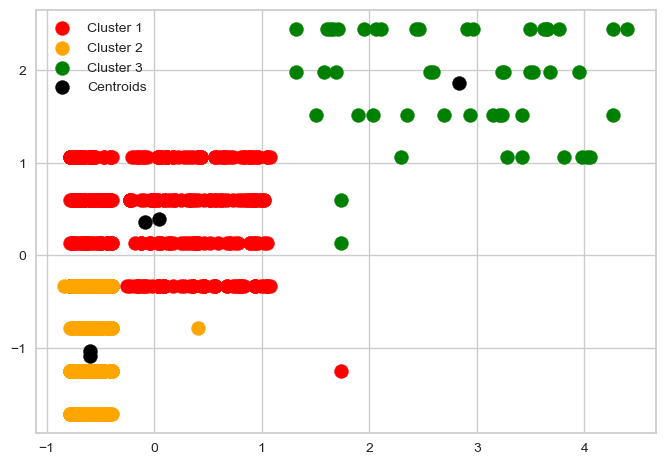

In [40]:
# Use filtered data for plotting
plt.scatter(cluster_0_data.iloc[:, 0], cluster_0_data.iloc[:, 1], s=100, c='red', label='Cluster 1')
plt.scatter(cluster_1_data.iloc[:, 0], cluster_1_data.iloc[:, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(cluster_2_data.iloc[:, 0], cluster_2_data.iloc[:, 1], s=100, c='green', label='Cluster 3')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids');

plt.legend()
plt.show()

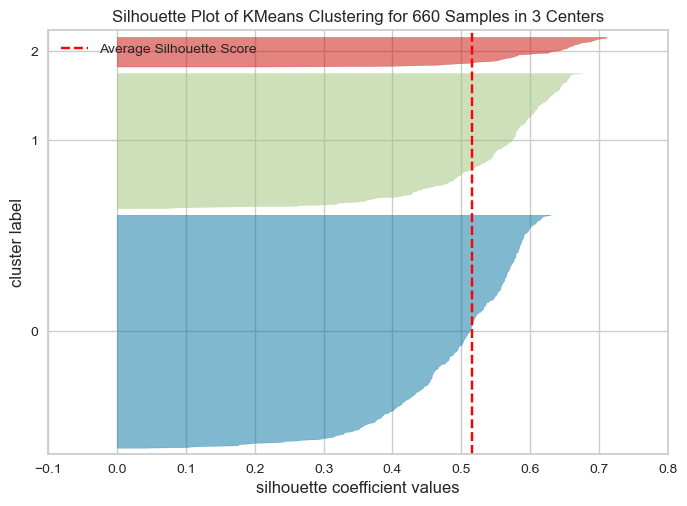

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()

In [33]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', max_iter=400, n_init=10)
    
    # Fit the model to the data
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate silhouette scores
    silhouette_vals = silhouette_samples(data_scaled, cluster_labels)
    
    avg_silhouette_score = silhouette_vals.mean()
    print(f'Number of clusters: {n_clusters}, Average silhouette score: {avg_silhouette_score:.2f}')

Number of clusters: 2, Average silhouette score: 0.42
Number of clusters: 3, Average silhouette score: 0.52
Number of clusters: 4, Average silhouette score: 0.36
Number of clusters: 5, Average silhouette score: 0.27


In [41]:
import scipy.cluster.hierarchy as sch

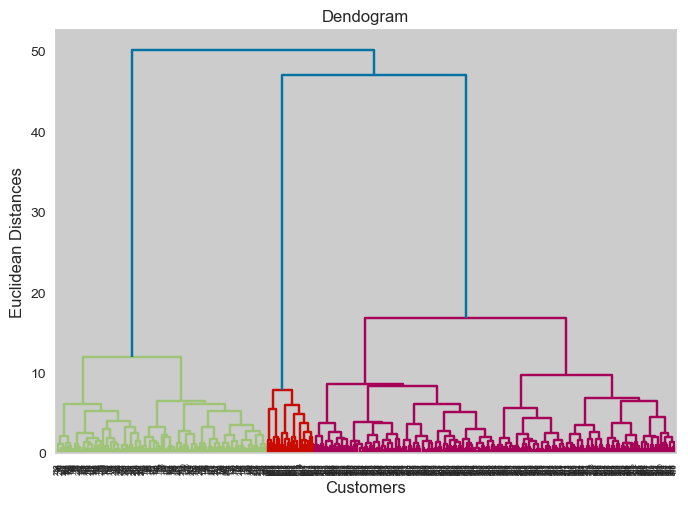

In [44]:
dendogram = sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

In [50]:
hc

AgglomerativeClustering(n_clusters=3)

In [51]:
labels_hc = hc.fit_predict(data_scaled)

In [52]:
labels_hc

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

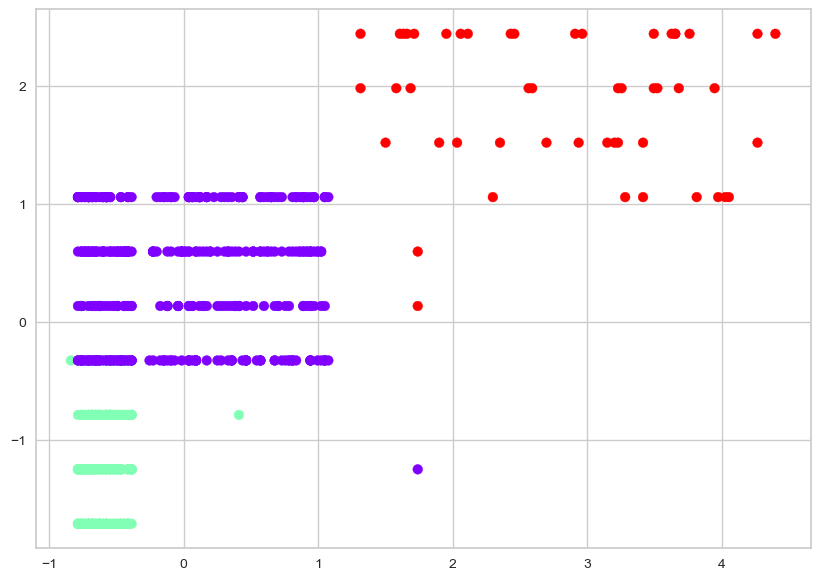

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled.iloc[:,0],data_scaled.iloc[:,1],c=labels_hc,cmap='rainbow')